In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Load files
l_stops_file = '/Users/em/Downloads/Crime_Analysis/CTA_-_System_Information_-_List_of__L__Stops_-_Map.csv'
l_station_entries_file = '/Users/em/Downloads/Crime_Analysis/CTA_-_Ridership_-__L__Station_Entries_-_Monthly_Day-Type_Averages___Totals_20231109.csv'

In [3]:
# Read the CSV files
l_stops_df = pd.read_csv(l_stops_file)
l_station_entries_df = pd.read_csv(l_station_entries_file)

In [4]:
# Display the first few rows of each dataset for initial examination
l_stops_df.head(), l_station_entries_df.head()

#Notes on L Train Datasets
    #1.CTA 'L' Stops (l_stops_df): Details about 'L' train stops, including stop name, station name, ADA accessibility, and the lines that serve each stop.
         #Key columns: STOP_ID (unique identifier), STOP_NAME, STATION_NAME, MAP_ID, ADA, RED, BLUE, etc. (indicating lines).

    #2.CTA 'L' Station Entries (l_station_entries_df): Ridership data for 'L' train stations, similar to the bus routes dataset, with averages for different days and total monthly ridership.
         #Key columns: station_id, stationame, month_beginning, avg_weekday_rides, monthtotal.

(   STOP_ID                     STOP_NAME  STATION_NAME  MAP_ID    ADA    RED  \
 0    30082           Cicero (Loop-bound)        Cicero   40420   True  False   
 1    30151     Central Park (Loop-bound)  Central Park   40780   True  False   
 2    30184  Halsted/63rd (Ashland-bound)       Halsted   40940   True  False   
 3    30044     Cumberland (O'Hare-bound)    Cumberland   40230   True  False   
 4    30092         Racine (O'Hare-bound)        Racine   40470  False  False   
 
     BLUE      G    BRN      P   Pexp      Y    Pnk      O  \
 0  False  False  False  False  False  False   True  False   
 1  False  False  False  False  False  False   True  False   
 2  False   True  False  False  False  False  False  False   
 3   True  False  False  False  False  False  False  False   
 4   True  False  False  False  False  False  False  False   
 
                   Location  
 0   (41.85182, -87.745336)  
 1  (41.853839, -87.714842)  
 2  (41.778943, -87.644244)  
 3  (41.984246, -8

In [5]:
# Data Cleaning Process

# Checkfor missing values in each dataset
missing_values = {
    "l_stops_df": l_stops_df.isnull().sum(),
    "l_station_entries_df": l_station_entries_df.isnull().sum()}

# Convert date columns to datetime objects for consistency
l_station_entries_df['month_beginning'] = pd.to_datetime(l_station_entries_df['month_beginning'])

missing_values

#CTA 'L' Stops (l_stops_df): No missing values. This dataset appears to be complete.
#CTA 'L' Station Entries (l_station_entries_df): No missing values. Dates have been converted to datetime objects.

{'l_stops_df': STOP_ID         0
 STOP_NAME       0
 STATION_NAME    0
 MAP_ID          0
 ADA             0
 RED             0
 BLUE            0
 G               0
 BRN             0
 P               0
 Pexp            0
 Y               0
 Pnk             0
 O               0
 Location        0
 dtype: int64,
 'l_station_entries_df': station_id                  0
 stationame                  0
 month_beginning             0
 avg_weekday_rides           0
 avg_saturday_rides          0
 avg_sunday-holiday_rides    0
 monthtotal                  0
 dtype: int64}

In [6]:
# Rename columns for consistency
l_station_entries_df.rename(columns={'station_id': 'MAP_ID'}, inplace=True)

# Merge the datasets on MAP_ID
l_combined_df = pd.merge(l_stops_df, l_station_entries_df, on='MAP_ID', how='inner')

# Extract latitude and longitude from the 'Location' column
l_combined_df[['latitude', 'longitude']] = l_combined_df['Location'].str.strip('()').str.split(', ', expand=True).astype(float)

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
l_combined_df.head()


,STOP_ID,STOP_NAME,STATION_NAME,MAP_ID,ADA,RED,BLUE,G,BRN,P,Pexp,Y,Pnk,O,Location,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday-holiday_rides,monthtotal,latitude,longitude
0,30082,Cicero (Loop-bound),Cicero,40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)",Cicero-Cermak,2001-01-01,845.6,4.5,0.0,18621,41.85182,-87.745336
1,30082,Cicero (Loop-bound),Cicero,40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)",Cicero-Cermak,2001-02-01,883.0,3.5,0.0,17673,41.85182,-87.745336
2,30082,Cicero (Loop-bound),Cicero,40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)",Cicero-Cermak,2001-03-01,883.8,4.2,0.0,19464,41.85182,-87.745336
3,30082,Cicero (Loop-bound),Cicero,40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)",Cicero-Cermak,2001-04-01,910.2,3.5,0.0,19128,41.85182,-87.745336
4,30082,Cicero (Loop-bound),Cicero,40420,True,False,False,False,False,False,False,False,True,False,"(41.85182, -87.745336)",Cicero-Cermak,2001-05-01,934.5,2.3,0.0,20567,41.85182,-87.745336


In [7]:
# Create a summary metric - average monthly ridership for each stop
l_summary = l_combined_df.groupby(['MAP_ID', 'STATION_NAME', 'latitude', 'longitude']).agg(
    avg_monthly_ridership=pd.NamedAgg(column='monthtotal', aggfunc='mean')
).reset_index()

l_summary.head()

,MAP_ID,STATION_NAME,latitude,longitude,avg_monthly_ridership
0,40010,Austin,41.870851,-87.776812,41995.103704
1,40020,Harlem/Lake,41.886848,-87.803176,85896.381481
2,40030,Pulaski,41.885412,-87.725404,39217.525926
3,40040,Quincy/Wells,41.878723,-87.633740,154963.481481
4,40050,Davis,42.047710,-87.683543,90185.651852


/Users/em/anaconda3/envs/crime_data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/em/anaconda3/envs/crime_data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/em/anaconda3/envs/crime_data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/em/anaconda3/envs/crime_data/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

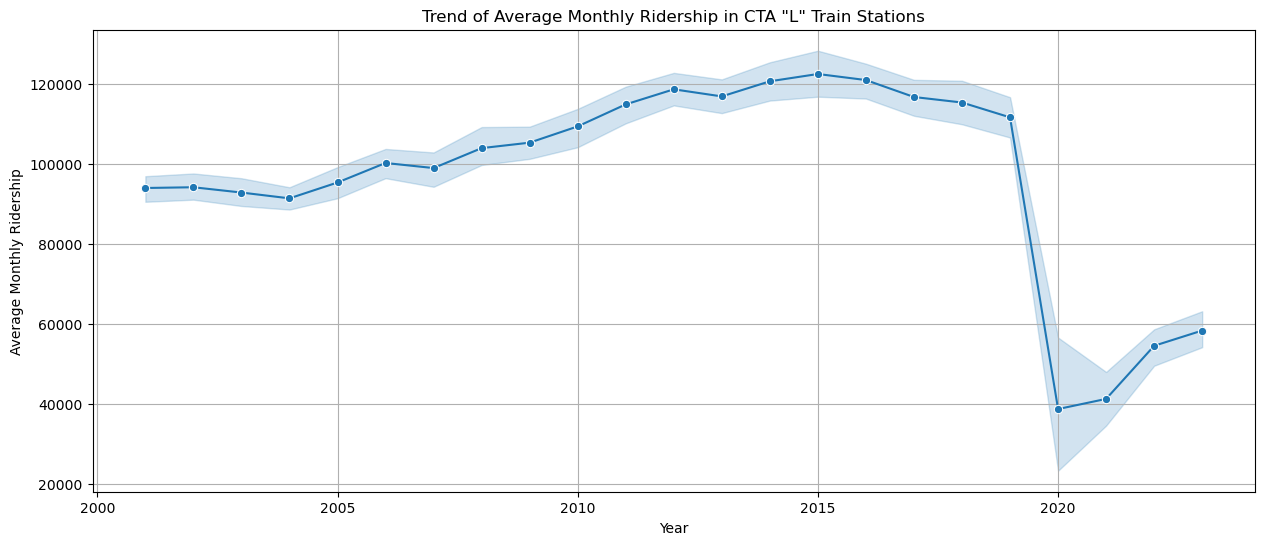

In [8]:
# Trend Analysis for 'L' train stations

# Group by month and year to see the trend over time
l_combined_df['year'] = l_combined_df['month_beginning'].dt.year
l_combined_df['month'] = l_combined_df['month_beginning'].dt.month

# Aggregate average monthly ridership
l_trend = l_combined_df.groupby(['year', 'month']).agg(avg_monthly_ridership=pd.NamedAgg(column='monthtotal', aggfunc='mean')).reset_index()

# Plot the trend
plt.figure(figsize=(15, 6))
sns.lineplot(data=l_trend, x='year', y='avg_monthly_ridership', marker='o')
plt.title('Trend of Average Monthly Ridership in CTA "L" Train Stations')
plt.xlabel('Year')
plt.ylabel('Average Monthly Ridership')
plt.grid(True)
plt.show()


In [9]:
# Identify most and least popular 'L' train stations based on average monthly ridership
most_popular_l_stations = l_summary.sort_values(by='avg_monthly_ridership', ascending=False).head(5)
least_popular_l_stations = l_summary.sort_values(by='avg_monthly_ridership', ascending=True).head(5)

most_popular_l_stations, least_popular_l_stations


(     MAP_ID   STATION_NAME   latitude  longitude  avg_monthly_ridership
 139   41660           Lake  41.884809 -87.627813          391408.496296
 35    40380     Clark/Lake  41.885737 -87.630886          386452.433333
 133   41450        Chicago  41.896671 -87.628176          355351.988889
 121   41320        Belmont  41.939751 -87.653380          289864.448148
 41    40450  95th/Dan Ryan  41.722377 -87.624342          285443.721190,
      MAP_ID   STATION_NAME   latitude  longitude  avg_monthly_ridership
 55    40600        Kostner  41.853751 -87.733258            9680.877778
 103   41140     King Drive  41.780130 -87.615546           15035.544444
 37    40400          Noyes  42.058282 -87.683337           17679.511111
 86    40940        Halsted  41.778943 -87.644244           17987.037037
 141   41680  Oakton-Skokie  42.026243 -87.747221           18067.318519)

In [10]:
#Run this code when done cleaning. Will create new CSV from cleaned dataframe and save to filepath
l_combined_df.to_csv('/Users/em/Documents/Cleaned_Data/L_Train_Data_Cleaned.csv', index=False)
